In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import LSTM, RNN, SimpleRNNCell


In [23]:

window=1

df1=pd.read_csv('data.csv') 
df1=df1.iloc[:,2:]
df1.tail()

,open,low,close,high
26272,7.1042,7.1042,7.1048,7.1055
26273,7.1047,7.1038,7.1038,7.1047
26274,7.1039,7.1039,7.1046,7.1047
26275,7.1048,7.1043,7.1045,7.1049
26276,7.1049,7.1049,7.1057,7.1057


In [24]:
#进行数据归一化
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df0=min_max_scaler.fit_transform(df1)
df = pd.DataFrame(df0, columns=df1.columns)
input_size=len(df.iloc[1,:])

In [25]:
stock = df
seq_len = window
amount_of_features = len(stock.columns)  # Number of columns/features
data = stock.values  # Convert DataFrame to matrix
sequence_length = seq_len + 1  # Sequence length (5 + 1)
result = []
for index in range(len(data) - sequence_length):  # Loop 170 - 5 times
    result.append(data[index: index + sequence_length])  # From the ith row to i + 5
result = np.array(result)  # Get 161 samples, each sample is shaped as 6 days * 3 features
row = round(0.9 * result.shape[0])  # Split into training and testing sets
train = result[:int(row), :]
x_train = train[:, :-1]
y_train = train[:, -1][:, -1]
x_test = result[int(row):, :-1]
y_test = result[int(row):, -1][:, -1]
# Reshape into 5 days * 3 features
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))


In [26]:


# Define parameters
d = 0.01

# Create model
model = Sequential()

# Add RNN layer with SimpleRNNCell
model.add(RNN(SimpleRNNCell(1024), input_shape=(window, input_size), return_sequences=False))
model.add(Dropout(d))

# Add Dense layer with ReLU activation
model.add(Dense(32, kernel_initializer='uniform'))
model.add(Activation('relu'))

# Output layer with linear activation
model.add(Dense(1, kernel_initializer='uniform'))
model.add(Activation('linear'))

# Compile model
model.compile(loss='mse', optimizer='adam')

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=256)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.1103
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 1.5740e-04
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 3.4902e-05
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 2.7970e-05
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 3.0930e-05
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8219e-05
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 3.1401e-05
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 3.7424e-05
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 2.8381e-05
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 3.1828e-05
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 2.8986e-05
Epoch 12/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 2.9866e-05
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 3.0527e-05
Epoch 14/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 3.7128e-05
Epoch 15/50
93/93 ━

In [27]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rnn (RNN)                       │ (None, 1024)           │     1,053,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,259,589 (12.43 MB)

 Trainable params: 1,086,529 (4.14 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,173,060 (8.29 MB)

In [28]:

y_train_predict=model.predict(X_train)
y_train_predict=y_train_predict[:,0]

739/739 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(0.5, 1.0, 'Train Data')

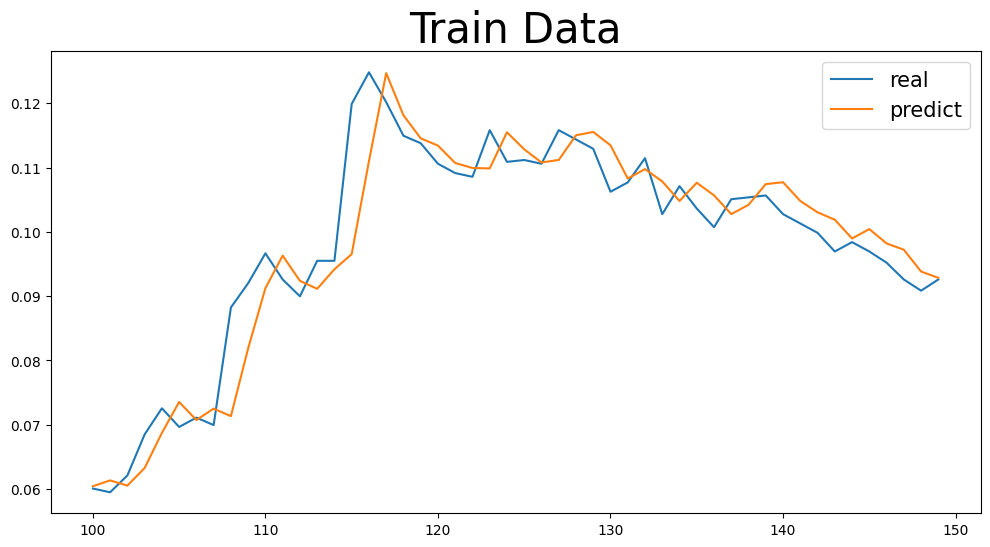

In [29]:
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[100:150,0].plot(figsize=(12,6))
draw.iloc[100:150,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),fontsize='15')
plt.title("Train Data",fontsize='30') #添加标题

#Show the performance on the training set

In [30]:
#在测试集上的预测
y_test_predict=model.predict(X_test)
y_test_predict=y_test_predict[:,0]

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Text(0.5, 1.0, 'Test Data')

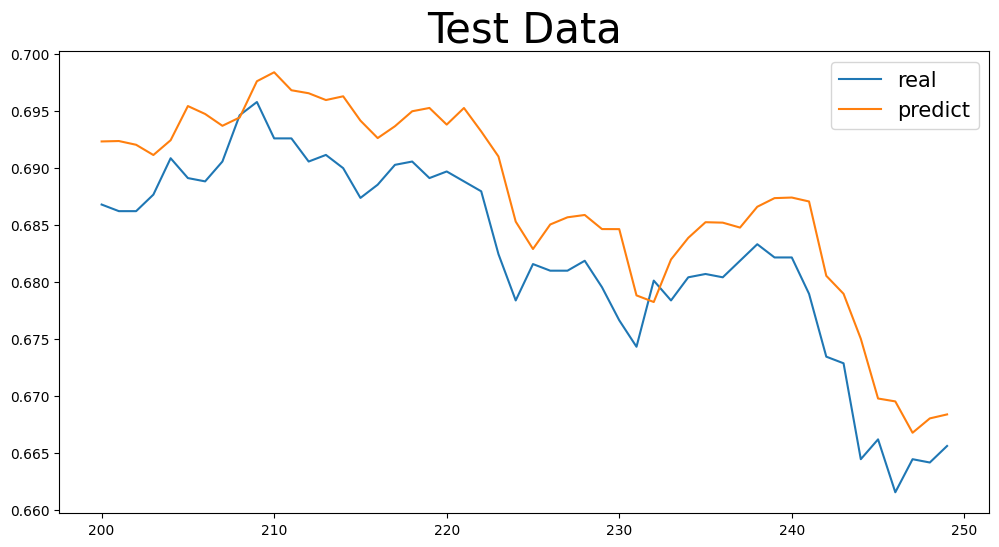

In [31]:
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[200:250,0].plot(figsize=(12,6))
draw.iloc[200:250,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') #添加标题
#展示在测试集上的表现 